### Import

In [1]:
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
import requests
from PIL import Image

In [2]:
import pandas as pd

In [3]:
import numpy as np

### Model

In [4]:
model = Pix2StructForConditionalGeneration.from_pretrained("google/deplot")
processor = AutoProcessor.from_pretrained("google/deplot")

config.json:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/851k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

### Test Images

### ChartQA

##### Horizantal Stacker Bar Chart ChartQA

In [ ]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/5090.png"
image = Image.open(requests.get(url, stream=True).raw)

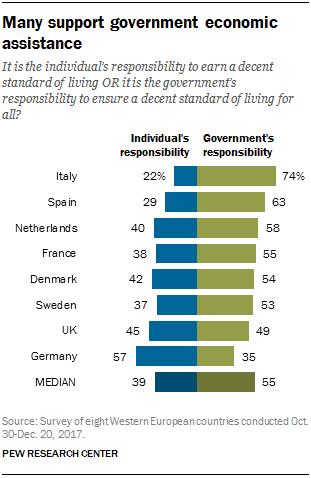

In [ ]:
image

In [ ]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

Arial.TTF:   0%|          | 0.00/276k [00:00<?, ?B/s]

In [ ]:
# 3 min
predictions = model.generate(**inputs, max_new_tokens=512)

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

Entity | Individuals responsibility | Government's responsibility <0x0A> MEDIAN | 39.0 | 55.0 <0x0A> Germany | nan | 35.0 <0x0A> UK | 45.0 | 49.0 <0x0A> Sweden | 37.0 | 53.0 <0x0A> Denmark | 42.0 | 54.0 <0x0A> France | 38.0 | 55.0 <0x0A> Netherla nns | 40.0 | 58.0 <0x0A> Spain | 29.0 | 63.0 <0x0A> Italy | 22.0 | 74.0


In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:]]
table = pd.DataFrame(data, columns=columns)
table

,Entity,Individuals responsibility,Government's responsibility
0,MEDIAN,39.0,55.0
1,Germany,nan,35.0
2,UK,45.0,49.0
3,Sweden,37.0,53.0
4,Denmark,42.0,54.0
5,France,38.0,55.0
6,Netherla nns,40.0,58.0
7,Spain,29.0,63.0
8,Italy,22.0,74.0


##### Horizantal Bar Chart ChartQA

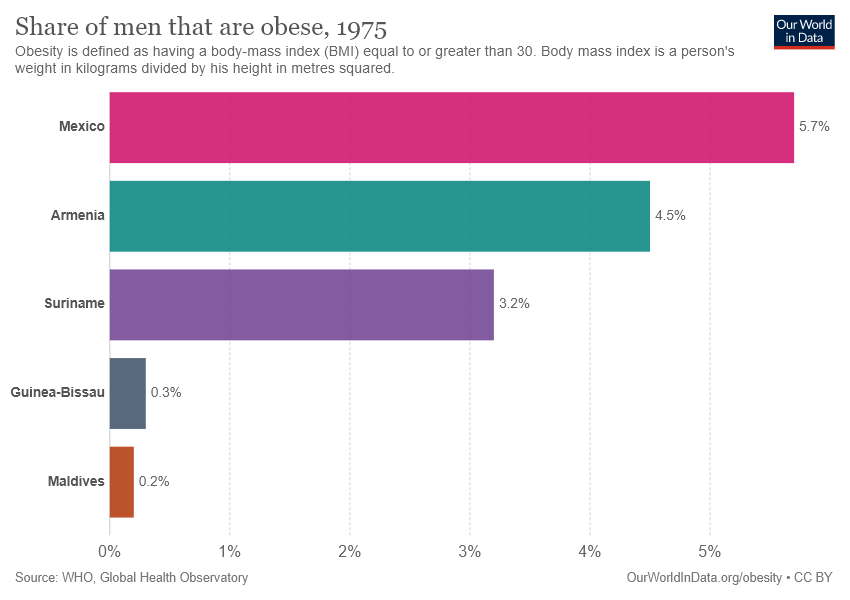

In [ ]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/30879216000290.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

In [ ]:
# 1 min
predictions = model.generate(**inputs, max_new_tokens=512)

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

Country | Share of men that are obese, 1975 <0x0A> Mexico | 5.7 <0x0A> Armenia | 4.5 <0x0A> Suriname | 3.2 <0x0A> Guinea-Bissau | 0.3 <0x0A> Maldives | 0.2


In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:]]
table = pd.DataFrame(data, columns=columns)
table

,Country,"Share of men that are obese, 1975"
0,Mexico,5.7
1,Armenia,4.5
2,Suriname,3.2
3,Guinea-Bissau,0.3
4,Maldives,0.2


##### Stacked Line Chart ChartQA

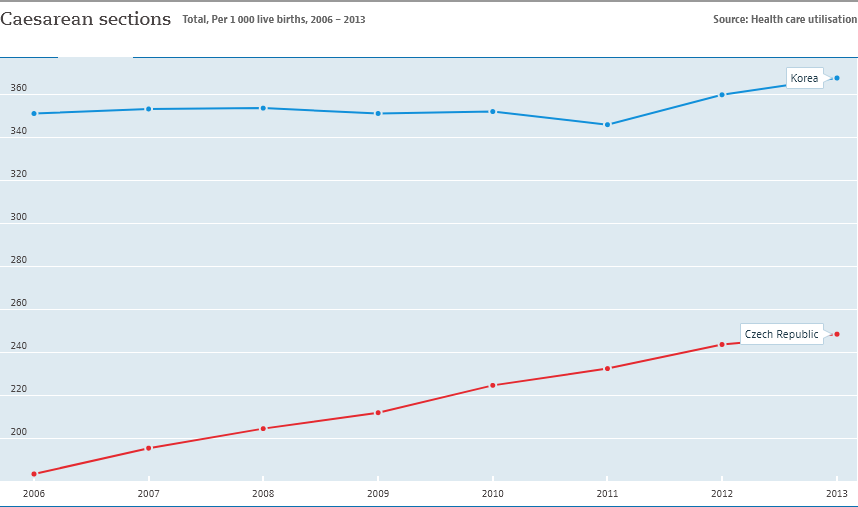

In [ ]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/OECD_CAESAREAN_SECTIONS_CZE_KOR_000034.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

In [ ]:
# 7 min
predictions = model.generate(**inputs, max_new_tokens=512)

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

Country | 2006 | 2007 | 2008 | 2009 | 2010 | 2011 | 2012 | 2013 <0x0A> Korea | 369.0 | 379.8 | 386.4 | 384.5 | 391.0 | 469.0 | 344.5 | 327.0 | 306.4 <0x0A> Czech Republic | 295.0 | 217.2 | 222.8 | 210.3 | 224.7 | 237.9 | 244.4 | 241.4 <0x0A> Korea | 353.4 | 354.9 | 355.4 | 349.5 | 352.7 | 344.1 | 337.6 | 321.8


In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:] if len(d.split("|")) == len(columns)]
table = pd.DataFrame(data, columns=columns)
table

,Country,2006,2007,2008,2009,2010,2011,2012,2013
0,Czech Republic,295.0,217.2,222.8,210.3,224.7,237.9,244.4,241.4
1,Korea,353.4,354.9,355.4,349.5,352.7,344.1,337.6,321.8


##### Vertical Grouped Bar Chart ChartQA

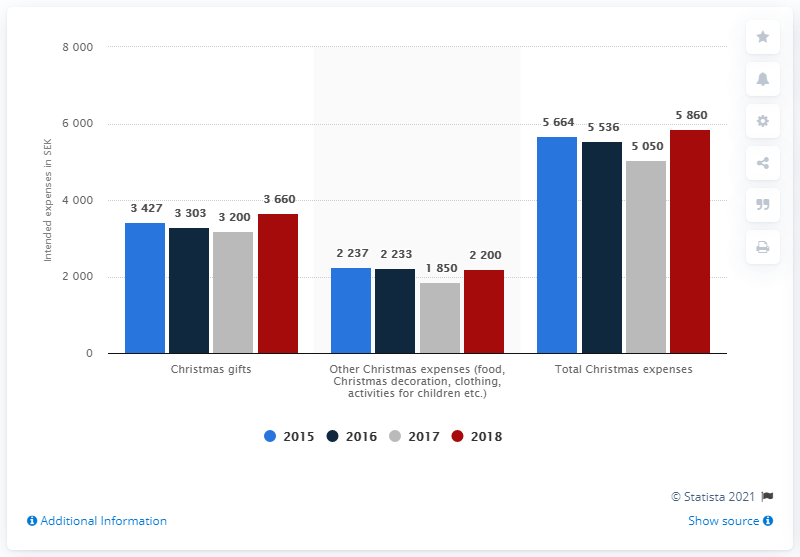

In [ ]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/multi_col_100621.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

In [ ]:
# 4 min
predictions = model.generate(**inputs, max_new_tokens=512)

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

Characteristic | 2015 | 2016 | 2017 | 2018 <0x0A> Christmas gifts | 3427 | 3303 | 3200 | 3660 <0x0A> Other Christmas expenses (food, Christmas decoration, clothing, activities for children etc.) | 2237 | 2233 | 1850 | 2200 <0x0A> Total Christmas expenses | 5664 | 5536 | 5050 | 5860


In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:] if len(d.split("|")) == len(columns)]
table = pd.DataFrame(data, columns=columns)
table

,Characteristic,2015,2016,2017,2018
0,Christmas gifts,3427,3303,3200,3660
1,"Other Christmas expenses (food, Christmas dec...",2237,2233,1850,2200
2,Total Christmas expenses,5664,5536,5050,5860


##### Vertical Bar Chart ChartQA

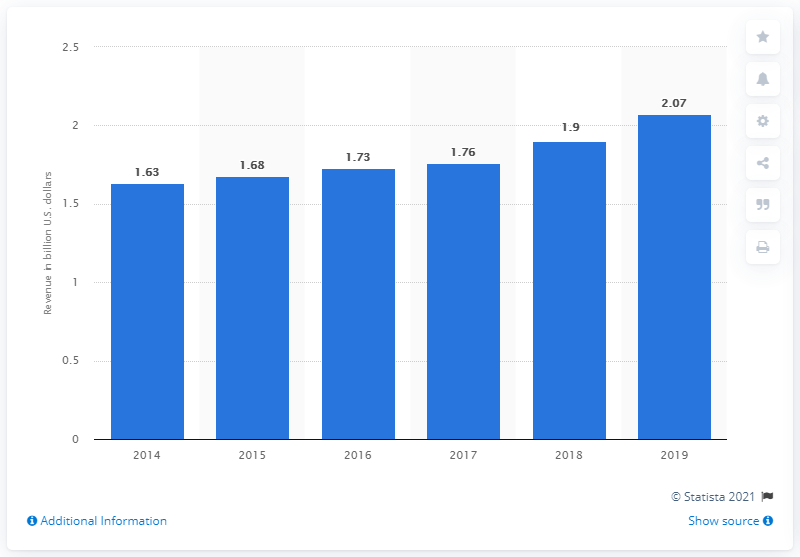

In [ ]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/two_col_24135.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

In [ ]:
# 2 min
predictions = model.generate(**inputs, max_new_tokens=512)

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

Characteristic | Revenue in billion U.S. dollars <0x0A> 2019 | 2.07 <0x0A> 2018 | 1.9 <0x0A> 2017 | 1.76 <0x0A> 2016 | 1.73 <0x0A> 2015 | 1.68 <0x0A> 2014 | 1.63


In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:] if len(d.split("|")) == len(columns)]
table = pd.DataFrame(data, columns=columns)
table

,Characteristic,Revenue in billion U.S. dollars
0,2019,2.07
1,2018,1.9
2,2017,1.76
3,2016,1.73
4,2015,1.68
5,2014,1.63


##### Horizantal Grouped Bar Chart ChartQA

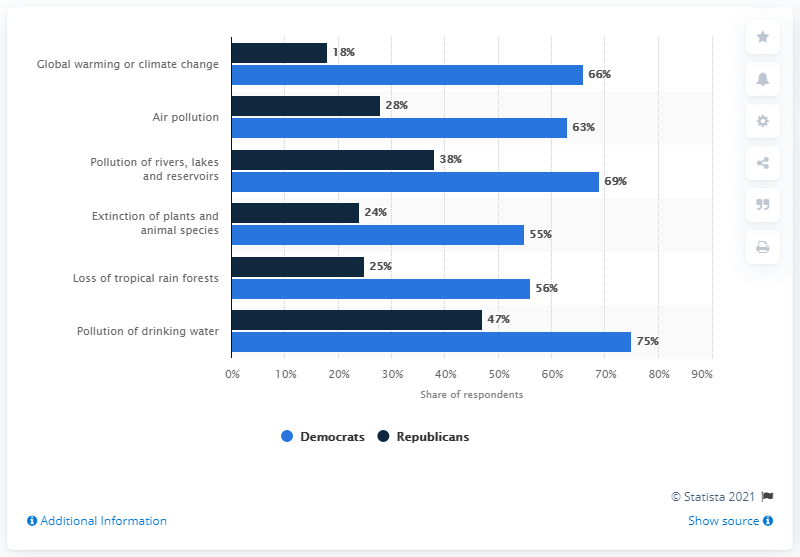

In [ ]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/multi_col_41011.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

In [ ]:
# 3 min
predictions = model.generate(**inputs, max_new_tokens=512)

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

Characteristic | Democrats | Republicans <0x0A> Global warming or climate change | 66% | 18% <0x0A> Air pollution | 63% | 28% <0x0A> Pollution of rivers, lakes and reservoirs | 69% | 38% <0x0A> Extinction of plants and animal species | 55% | 24% <0x0A> Loss of tropical rain forests | 56% | 25% <0x0A> Pollution of drinking water | 75% | 47%


In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:] if len(d.split("|")) == len(columns)]
table = pd.DataFrame(data, columns=columns)
table

,Characteristic,Democrats,Republicans
0,Global warming or climate change,66%,18%
1,Air pollution,63%,28%
2,"Pollution of rivers, lakes and reservoirs",69%,38%
3,Extinction of plants and animal species,55%,24%
4,Loss of tropical rain forests,56%,25%
5,Pollution of drinking water,75%,47%


##### Vertical Stacked Bar Chart ChartQA

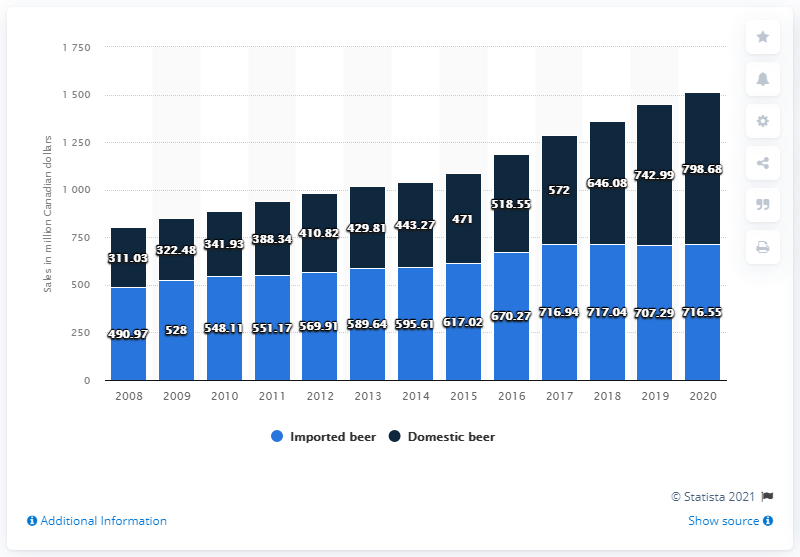

In [ ]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/multi_col_60050.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

In [ ]:
# 13 min
predictions = model.generate(**inputs, max_new_tokens=512)

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

Characteristic | Imported beer | Domestic beer <0x0A> 2020 | 716.55 | 798.68 <0x0A> 2019 | 707.29 | 742.99 <0x0A> 2018 | 717.09 | 646.08 <0x0A> 2017 | 716.94 | 572.0 <0x0A> 2016 | 670.27 | 518.55 <0x0A> 2015 | 617.02 | 471.0 <0x0A> 2014 | 595.61 | 443.27 <0x0A> 2013 | 589.64 | 429.81 <0x0A> 2012 | 569.91 | 410.82 <0x0A> 2011 | 551.17 | 388.34 <0x0A> 2010 | 548.11 | 341.83 <0x0A> 2009 | 528.0 | 322.46 <0x0A> 2008 | 490.97 | 11.03


In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:] if len(d.split("|")) == len(columns)]
table = pd.DataFrame(data, columns=columns)
table

,Characteristic,Imported beer,Domestic beer
0,2020,716.55,798.68
1,2019,707.29,742.99
2,2018,717.09,646.08
3,2017,716.94,572.0
4,2016,670.27,518.55
5,2015,617.02,471.0
6,2014,595.61,443.27
7,2013,589.64,429.81
8,2012,569.91,410.82
9,2011,551.17,388.34


##### Stacked Line Chart ChartQA

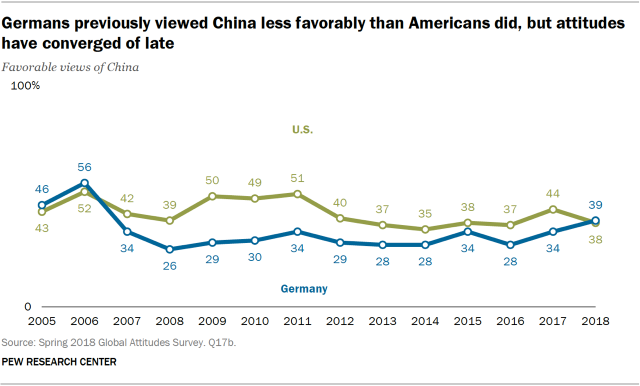

In [ ]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/3887.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

In [ ]:
# 2 min
predictions = model.generate(**inputs, max_new_tokens=512)

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

Year | Germany | U.S. of China <0x0A> 2005 | 46 | 46 <0x0A> 2006 | 56 | 52 <0x0A> 2007 | 34 | 0 <0x0A> 2008 | 26 | 39 <0x0A> 2009 | 29 | 50 <0x0A> 2010 | 30 | 49 <0x0A> 2011 | 34 | 51 <0x0A> 2012 | 29 | 40 <0x0A> 2013 | 28 | 0 <0x0A> 2014 | 35 | 35 <0x0A> 2015 | 38 | 0 <0x0A> 2016 | 28 | 0 <0x0A> 2017 | 34 | 0 <0x0A> 2018 | 38 | 0


In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:] if len(d.split("|")) == len(columns)]
table = pd.DataFrame(data, columns=columns)
table

,Year,Germany,U.S. of China
0,2005,46,46
1,2006,56,52
2,2007,34,0
3,2008,26,39
4,2009,29,50
5,2010,30,49
6,2011,34,51
7,2012,29,40
8,2013,28,0
9,2014,35,35


##### Pie Chart ChartQA

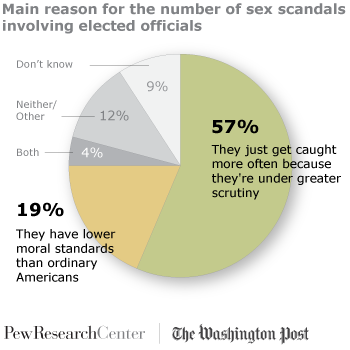

In [ ]:
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/16968.png"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

Arial.TTF:   0%|          | 0.00/276k [00:00<?, ?B/s]

In [ ]:
# 2 min
predictions = model.generate(**inputs, max_new_tokens=512)

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

Entity | Value <0x0A> They just get caught more often because they're under greater scrutiny | 57.0 <0x0A> Don't know | 9.0 <0x0A> Neither/ Other  Both   They were more often because they're under greater scrutiny | 12.0 <0x0A> nan | nan


In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:] if len(d.split("|")) == len(columns)]
table = pd.DataFrame(data, columns=columns)
table

,Entity,Value
0,They just get caught more often because they'...,57.0
1,Don't know,9.0
2,Neither/ Other Both They were more often b...,12.0
3,nan,nan


### ECGs

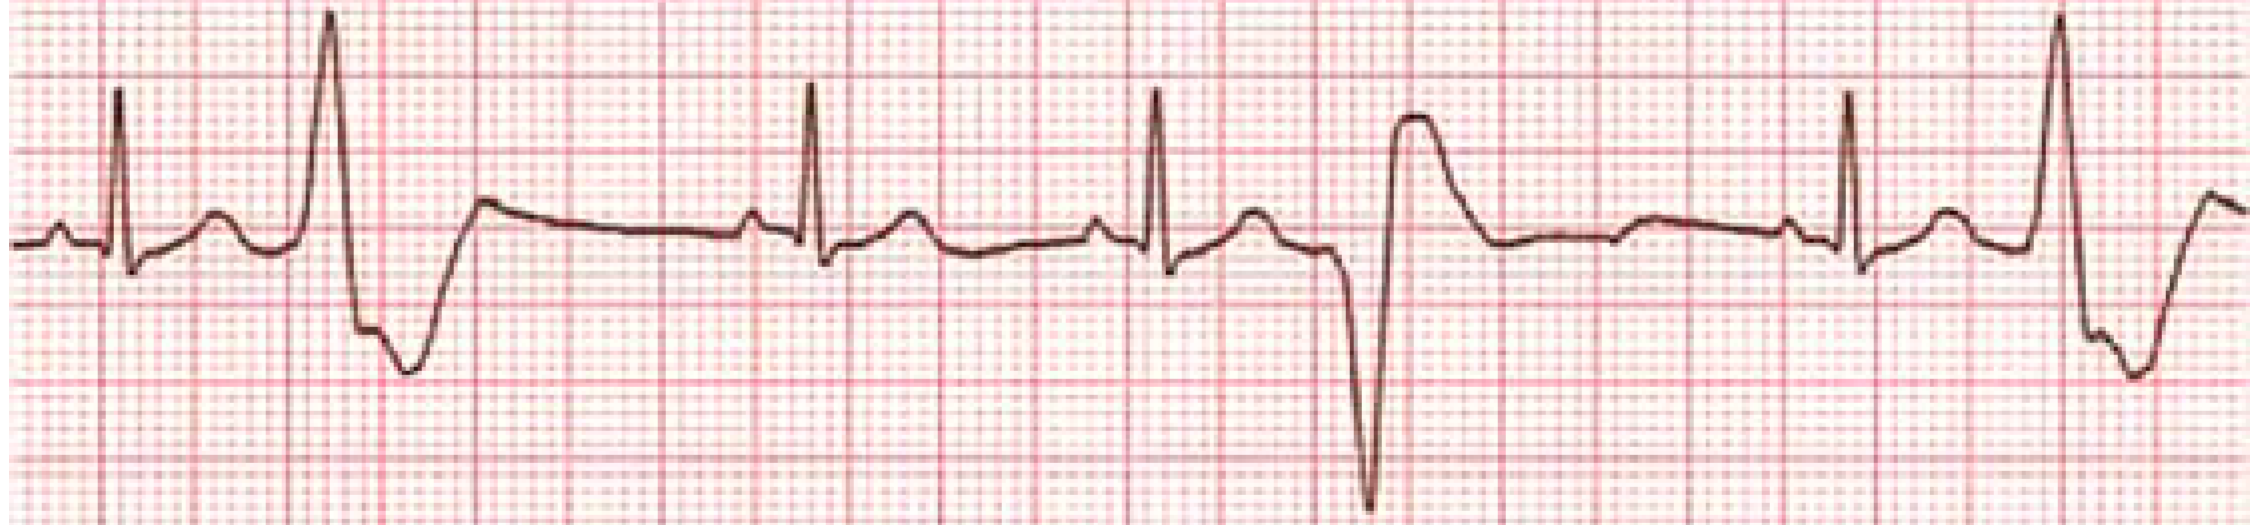

In [5]:
path = "/content/ECG 1.png"
image = Image.open(path)
image

In [6]:
inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")

Arial.TTF:   0%|          | 0.00/276k [00:00<?, ?B/s]

In [7]:
# 2 min
predictions = model.generate(**inputs, max_new_tokens=512)

KeyboardInterrupt: 

In [ ]:
table_data = processor.decode(predictions[0], skip_special_tokens=True)
print(table_data)

In [ ]:
entities = table_data.split("<0x0A>")
columns = entities[0].split("|")
data = [d.split("|") for d in entities[1:] if len(d.split("|")) == len(columns)]
table = pd.DataFrame(data, columns=columns)
table

,Year,Germany,U.S. of China
0,2005,46,46
1,2006,56,52
2,2007,34,0
3,2008,26,39
4,2009,29,50
5,2010,30,49
6,2011,34,51
7,2012,29,40
8,2013,28,0
9,2014,35,35
